# ASSIGNMENT 2

In [1]:
import numpy as np
import pandas as pd

import os

from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r'D:\NAYANA\Term 2\ML\Files\HR Analytics.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Cleaning and Pre-Processing

In [3]:
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Normalization of Data

In [4]:
data1 = data.copy()

scaler = MinMaxScaler()
ls = list()

for column in data.columns:
    x = data[[column]].values.astype(float)
    x_scaler = scaler.fit_transform(x)
    name = column+'1'
    data1[name] = x_scaler

In [5]:
ls = ['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1','EducationField1',
      'EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1','HourlyRate1','JobInvolvement1','JobLevel1',
      'JobRole1','JobSatisfaction1','MaritalStatus1','MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181',
      'OverTime1','PercentSalaryHike1','PerformanceRating1','RelationshipSatisfaction1','StandardHours1',
      'StockOptionLevel1','TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
      'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1','Attrition1']

data_scaled = data1[ls]
data_scaled.head()

,Age1,BusinessTravel1,DailyRate1,Department1,DistanceFromHome1,Education1,EducationField1,EmployeeCount1,EmployeeNumber1,EnvironmentSatisfaction1,...,StandardHours1,StockOptionLevel1,TotalWorkingYears1,TrainingTimesLastYear1,WorkLifeBalance1,YearsAtCompany1,YearsInCurrentRole1,YearsSinceLastPromotion1,YearsWithCurrManager1,Attrition1
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.0,0.000000,0.333333,...,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.0
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.0,0.000484,0.666667,...,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,0.0,0.001935,1.000000,...,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.0,0.002903,0.000000,...,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0


# 1. KNN - Algorithm

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Separtating the data into target variable and predictor's variable

In [7]:
X = data_scaled.loc[:,['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1',
                       'EducationField1','EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1',
                       'HourlyRate1','JobInvolvement1','JobLevel1','JobRole1','JobSatisfaction1','MaritalStatus1',
                       'MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181','OverTime1','PercentSalaryHike1',
                       'PerformanceRating1','RelationshipSatisfaction1','StandardHours1','StockOptionLevel1',
                       'TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
                       'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1']]

Y = data_scaled.loc[:,'Attrition1']

# Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

# To find the optimal K value using plotting the graph

In [8]:
# Finding the optimal K

k = list(range(1,len(x_test),2))
mis_list = []
dist = {}

for i in k:
    vary_knn = KNeighborsClassifier(n_neighbors=i)
    vary_knn.fit(x_train,y_train)
    
    misclassifer = int(len(x_test) - (vary_knn.score(x_test,y_test)* len(x_test)))
    
    mis_list.append(misclassifer)
    dist[i] = misclassifer
    
print(dist)

{1: 56, 3: 54, 5: 49, 7: 46, 9: 41, 11: 43, 13: 44, 15: 46, 17: 46, 19: 47, 21: 47, 23: 48, 25: 49, 27: 48, 29: 49, 31: 49, 33: 48, 35: 48, 37: 48, 39: 49, 41: 49, 43: 49, 45: 49, 47: 49, 49: 49, 51: 49, 53: 49, 55: 49, 57: 49, 59: 49, 61: 49, 63: 49, 65: 49, 67: 49, 69: 49, 71: 49, 73: 49, 75: 49, 77: 49, 79: 49, 81: 49, 83: 49, 85: 49, 87: 49, 89: 49, 91: 49, 93: 49, 95: 49, 97: 49, 99: 49, 101: 49, 103: 49, 105: 49, 107: 49, 109: 49, 111: 49, 113: 49, 115: 49, 117: 49, 119: 49, 121: 49, 123: 49, 125: 49, 127: 49, 129: 49, 131: 49, 133: 49, 135: 49, 137: 49, 139: 49, 141: 49, 143: 49, 145: 49, 147: 49, 149: 49, 151: 49, 153: 49, 155: 49, 157: 49, 159: 49, 161: 49, 163: 49, 165: 49, 167: 49, 169: 49, 171: 49, 173: 49, 175: 49, 177: 49, 179: 49, 181: 49, 183: 49, 185: 49, 187: 49, 189: 49, 191: 49, 193: 49, 195: 49, 197: 49, 199: 49, 201: 49, 203: 49, 205: 49, 207: 49, 209: 49, 211: 49, 213: 49, 215: 49, 217: 49, 219: 49, 221: 49, 223: 49, 225: 49, 227: 49, 229: 49, 231: 49, 233: 49, 2

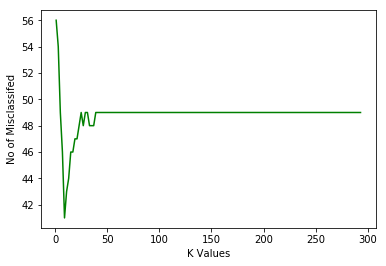

In [9]:
# Plotting the graph

plt.plot(k, mis_list, color = 'green')
plt.xlabel("K Values")
plt.ylabel("No of Misclassifed")
plt.show()

* Comapring the above graph with the values in the dictionary,we can observe that the value of the missclassifier is low when k = 9.
* Thus, the optimal value of K is 9.
* Hence, using k = 9 while building the model.

# Build KNN model and Predicting the value to x_test

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(x_test)

# Finding the accuracy of the model

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 86.05442176870748


* The accuracy of the model with k = 9 is 86.05%.
* Thus, we can predict 86.05% of information of target variable accurately from the model.

# Finding Area Under the Curve

In [12]:
# Returing probability estimates for the test vector

probs = knn.predict_proba(x_test)

# Keep probability of the positive rate

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

# Area under the curve

print("Area under the curve : ", roc_auc)

Area under the curve :  0.7323615160349854


* Area under the curve is 73.23%.
* Thus, 73% of the data is predicted correctly.

# Confussion Matrix

In [13]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[245,   0],
       [ 41,   8]], dtype=int64)

* From the confussion matrix, 245 are truely classified as positive, 41 are falsely classified as negative and 8 are truely classified as negative.
* i.e., out of 294 rows, 253 are correctly classified and 41 are wrongly classified.

# ROC Graph

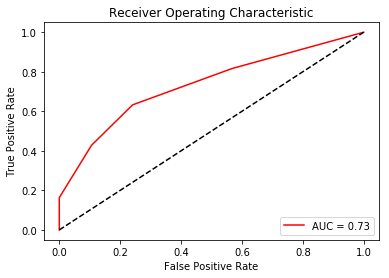

In [14]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes Algorithm

In [15]:
from time import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score

# Without Scaling

# Separtating the data into target variable and predictor's variable

In [16]:
X = data.loc[:,['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField',
                 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement',
                 'JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate',
                 'NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating',
                 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears', 
                 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                 'YearsSinceLastPromotion','YearsWithCurrManager']]

Y = data.loc[:,'Attrition']

# Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

# Gaussian Naive Bayes

In [17]:
gnb = GaussianNB()

print("Start training...")
tStart = time()
gnb.fit(x_train, y_train)

print("Training time: ", round(time()-tStart, 3), "s")

# Making predictions on the testing set

y_pred = gnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.01 s
Accuracy:  79.93197278911565


* The model is 79.93% accurate.
* Using this model, we can predict 79.93% of information of target variable ('Attrition') accurately.

In [18]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[205  40]
 [ 19  30]]


* From this confussion matrix, 205 are truely classified as positive,40 are falsely classeified as positive, 19 are falsely classified as negative and 30 are truely classified as negative.
* i.e., out of 294 rows, 235 are correctly classified and 59 are wrongly classified.

In [19]:
# Return probability estimates for the test vector 

probs = gnb.predict_proba(x_test)

# Keep Probabilities of the positive class only

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7652644731361932


* Area under the curve is 76.52%.
* So, 76% of the data is predicted correctly.

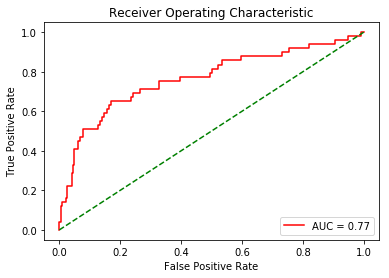

In [20]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Bernoulli Naive Bayes

In [21]:
bnb=BernoulliNB()

print("Start training...")
tStart = time()
bnb.fit(x_train, y_train)

print("Training time: ", round(time()-tStart, 3), "s")

# Making predictions on the testing set

y_pred = bnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.006 s
Accuracy:  81.97278911564626


* The model is 81.97% accurate.
* Using this model, we can predict 81.97% of information of target variable ('Attrition') accurately.

In [22]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[230  15]
 [ 38  11]]


* From this confussion matrix, 230 are truely classified as positive, 15 are falsely classified as positive, 38 are falsely classified as negative and 11 are truely classified as negative.
* i.e., out of 294 rows, 241 are correctly classified and 53 are wrongly classified.

In [23]:
# Return probability estimates for the test vector 

probs = bnb.predict_proba(x_test)

# Keep Probabilities of the positive class only

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7623490212411496


* Area under the curve is 76.23%.
* So, 76% of the data is predicted correctly.

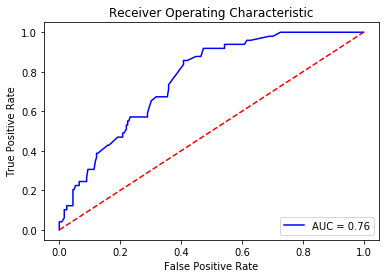

In [24]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Multinormial Naive Bayes

In [25]:
mnb=MultinomialNB()

print("Start training...")
tStart = time()
mnb.fit(x_train, y_train)

print("Training time: ", round(time()-tStart, 3), "s")

# Making predictions on the testing set

y_pred = mnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.005 s
Accuracy:  52.04081632653062


* The model is 52.04% accurate.
* Using this model, we can predict 52.04% of information of target variable ('Attrition') accurately.

In [26]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[124 121]
 [ 20  29]]


* From this confussion matrix, 124 are truely classified as positive, 121 are falsely classified as positive, 20 are falsely classified as negative and 29 are truely classified as negative.
* i.e., out of 294 rows, 153 are correctly classified and 141 are wrongly classified.

In [27]:
# Return probability estimates for the test vector 

probs = mnb.predict_proba(x_test)

# Keep Probabilities of the positive class only

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5586838817159516


* Area under the curve is 55.86%.
* So, 55% of the data is predicted correctly.

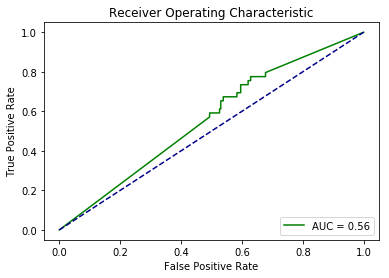

In [28]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# CONCLUSION
* The ideal model for given data set is Gaussian Naive Bayes Algorithm model with an accuracy of 79.93% and area under the curve 0.77.
* From this we can predict 79.93% of information of target variable and 76.52% of data correctly.

# With Scaling

In [29]:
# Separtating the data into target variable and predictor's variable

X = data_scaled.loc[:,['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1',
                       'EducationField1','EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1',
                       'HourlyRate1','JobInvolvement1','JobLevel1','JobRole1','JobSatisfaction1','MaritalStatus1',
                       'MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181','OverTime1','PercentSalaryHike1',
                       'PerformanceRating1','RelationshipSatisfaction1','StandardHours1','StockOptionLevel1',
                       'TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
                       'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1']]

Y = data_scaled.loc[:,'Attrition1']

# Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

# Gaussian Naive Bayes

In [30]:
gnb = GaussianNB()

print("Start training...")
tStart = time()
gnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# Making predictions on the testing set

y_pred = gnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.004 s
Accuracy:  79.93197278911565


* The model is 79.93% accurate.
* Using this model, we can predict 79.93% of information of target variable ('Attrition') accurately.

In [31]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[203  42]
 [ 17  32]]


* From this confussion matrix, 203 are truely classified as positive,42 are falsely classeified as positive, 17 are falsely classified as negative and 32 are truely classified as negative.
* i.e., out of 294 rows, 235 are correctly classified and 59 are wrongly classified

In [32]:
# Return probability estimates for the test vector 

probs = gnb.predict_proba(x_test)

# Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.772594752186589


* Area under the curve is 77.25%.
* So, 77% of the data is predicted correctly.

# Plot ROC curve

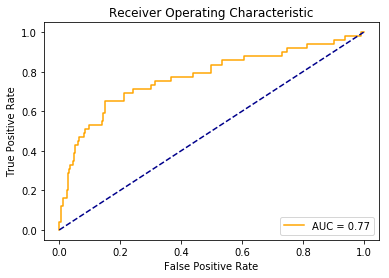

In [33]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Bernoulli Naive Bayes

In [34]:
bnb=BernoulliNB()

print("Start training...")
tStart = time()
bnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = bnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.006 s
Accuracy:  84.01360544217688


* The model is 84.013% accurate.
* Using this model, we can predict 84.013% of information of target variable ('Attrition') accurately.

In [35]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[232  13]
 [ 34  15]]


* From this confussion matrix, 232 are truely classified as positive, 13 are falsely classified as positive, 34 are falsely classified as negative and 15 are truely classified as negative.
* i.e., out of 294 rows, 247 are correctly classified and 47 are wrongly classified

In [36]:
# Return probability estimates for the test vector 

probs = bnb.predict_proba(x_test)

# Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7734693877551021


* Area under the curve is 77.34%.
* So, 77% of the data is predicted correctly.

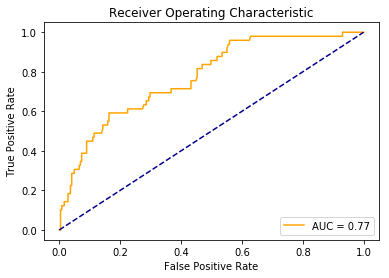

In [37]:
# Plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Multinormial Naive Bayes

In [38]:
mnb=MultinomialNB()

print("Start training...")
tStart = time()
mnb.fit(x_train, y_train)
print("Training time: ", round(time()-tStart, 3), "s")

# making predictions on the testing set 
y_pred = mnb.predict(x_test) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Start training...
Training time:  0.006 s
Accuracy:  83.33333333333334


* The model is 83.33% accurate.
* Using this model, we can predict 83.33% of information of target variable ('Attrition') accurately.

In [39]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[245   0]
 [ 49   0]]


* From this confussion matrix, 245 are truely classified as positive 49 are falsely classified as negative.
* i.e., out of 294 rows, 245 are correctly classified and 49 are wrongly classified

In [40]:
#Return probability estimates for the test vector 

probs = mnb.predict_proba(x_test)

#Keep Probabilities of the positive class only.
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.8132444814660558


* Area under the curve is 81.32%.
* So, 81% of the data is predicted correctly.

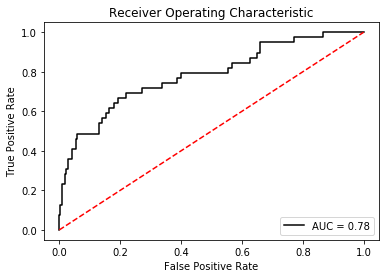

In [109]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# CONCLUSION

* The ideal model for given data set is Multinomial Naive Bayes Algorithm model with an accurary of 83.33% and area under the curve 0.81. 
* From this we can predict 83.33% of information of target variable and 81.32% of data correctly.

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Without scaling

In [43]:
# Separtating the data into target variable and predictor's variable

X = data.loc[:,['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField',
                 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement',
                 'JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate',
                 'NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating',
                 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears', 
                 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                 'YearsSinceLastPromotion','YearsWithCurrManager']]

Y = data.loc[:,'Attrition']

# Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

# Build Logistic regression model and Predicting the value to x_test

In [44]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


# Accurary

In [46]:
print("Logistic regression score = ", lr.score(x_test, y_test)) 

Logistic regression score =  0.8639455782312925


* The model is 87.07% accurate.
* Using this model, we can predict 87.07% of information of target variable ('Attrition') accurately.

# Confussion matrix

In [47]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n') 

Confusion Matrix is:
[[241   4]
 [ 36  13]]


* From this confussion matrix, 239 are truely classified as positive, 6 are falsely classified as positive, 32 are falsely classified as negative and 17 are truely classified as negative.
* i.e., out of 294 rows, 256 are correctly classified and 38 are wrongly classified

# Area under the curve

In [48]:
probs = lr.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.8360683048729696


* Area under the curve is 84.78%.
* So, 84% of the data is predicted correctly.

# ROC curve

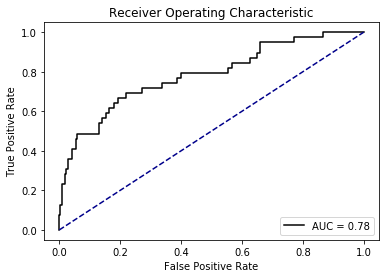

In [111]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# With scaling

In [50]:
# Separtating the data into target variable and predictor's variable

X = data_scaled.loc[:,['Age1','BusinessTravel1','DailyRate1','Department1','DistanceFromHome1','Education1',
                       'EducationField1','EmployeeCount1','EmployeeNumber1','EnvironmentSatisfaction1','Gender1',
                       'HourlyRate1','JobInvolvement1','JobLevel1','JobRole1','JobSatisfaction1','MaritalStatus1',
                       'MonthlyIncome1','MonthlyRate1','NumCompaniesWorked1','Over181','OverTime1','PercentSalaryHike1',
                       'PerformanceRating1','RelationshipSatisfaction1','StandardHours1','StockOptionLevel1',
                       'TotalWorkingYears1', 'TrainingTimesLastYear1','WorkLifeBalance1','YearsAtCompany1',
                       'YearsInCurrentRole1','YearsSinceLastPromotion1','YearsWithCurrManager1']]

Y = data_scaled.loc[:,'Attrition1']

# Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
x_train.shape

(1176, 34)

# Build Logistic regression model and Predicting the value to x_test

In [51]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = lr.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]


# Accurary

In [53]:
print("Logistic regression score = ", lr.score(x_test, y_test))

Logistic regression score =  0.8809523809523809


* The model is 88.09% accurate.
* Using this model, we can predict 88.09% of information of target variable ('Attrition') accurately.

# Confussion matrix

In [54]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[242   3]
 [ 32  17]]


* From this confussion matrix, 242 are truely classified as positive, 3 are falsely classified as positive, 32 are falsely classified as negative and 17 are truely classified as negative.
* i.e., out of 294 rows, 259 are correctly classified and 35 are wrongly classified

# Area under the curve

In [55]:
probs = lr.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.8513952519783423


* Area under the curve is 85.13%.
* So, 85% of the data is predicted correctly.

# ROC curve

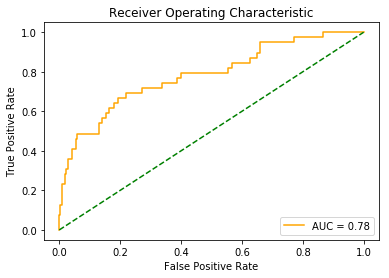

In [112]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Information Gain

In [58]:
# Separtating the data into target variable and predictor's variable

Y = data['Attrition']
X = data.drop('Attrition',axis = 1)

# X.shape, Y.shape, data.shape

#Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
x_train.shape

(1029, 34)

# Build Decision Trees and Predicting the value to x_test

In [59]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]


# Confussion matrix

In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[330,  41],
       [ 49,  21]], dtype=int64)

* From this confussion matrix, 333 are truely classified as positive, 38 are falsely classified as positive, 46 are falsely classified as negative and 24 are truely classified as negative.
* i.e., out of 441 rows, 357 are correctly classified and 84 are wrongly classified

# Accurary

In [62]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 79.59183673469387


* The model is 80.95% accurate.
* Using this model, we can predict 80.95% of information of target variable ('Attrition') accurately.

# Drawing Decision Tree

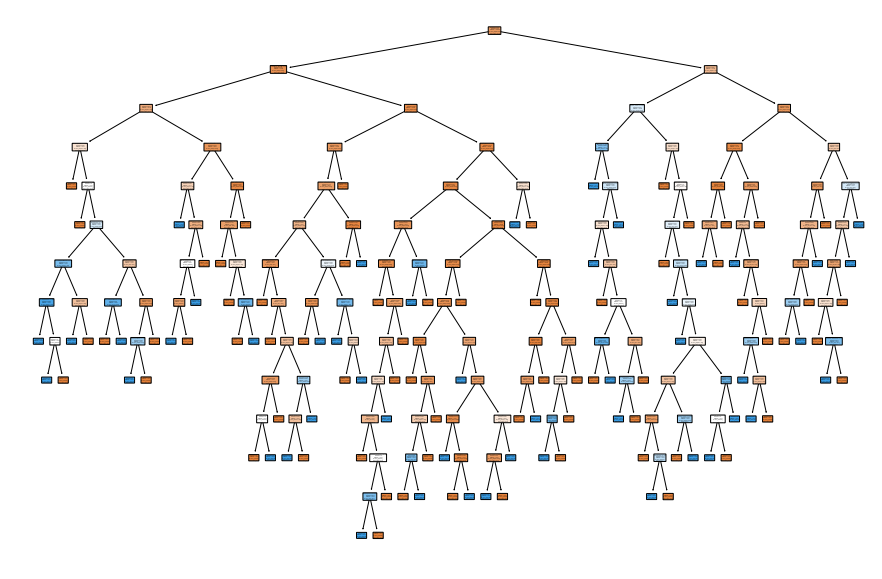

In [63]:
cols = list(X.columns.values)
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

# Area under the curve

In [64]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5746630727762804


* Area under the curve is 59.2%.
* So, 59% of the data is predicted correctly.

# ROC curve

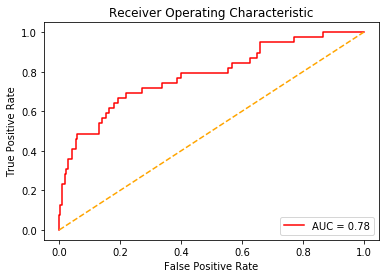

In [113]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# With Pruning

# Build Decision Trees and Predicting the value to x_test

In [66]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_leaf_nodes=10, min_samples_leaf=5,
                            max_depth=5)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [67]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


# Confussion matrix

In [68]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[343,  28],
       [ 42,  28]], dtype=int64)

* From this confussion matrix, 371 are truely classified as positive, 64 are falsely classified as negative and 6 are truely classified as negative.
* i.e., out of 441 rows, 377 are correctly classified and 64 are wrongly classified

# Accurary

In [69]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 84.12698412698413


* The model is 85.48% accurate.
* Using this model, we can predict 85.48% of information of target variable ('Attrition') accurately.

# Drawing Decision Tree

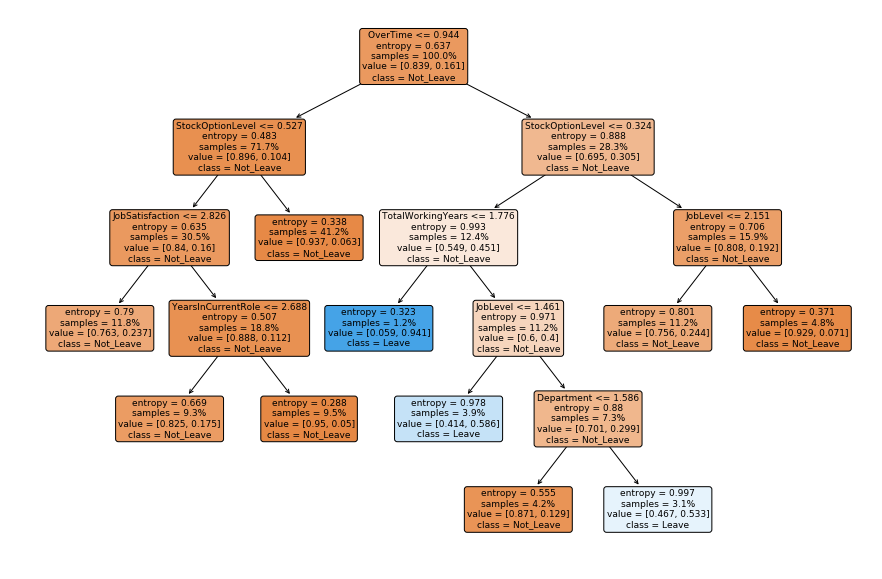

In [70]:
cols = list(X.columns.values)
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(X,Y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

# Area under the curve

In [71]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7522333461686561


* Area under the curve is 77.37%.
* So, 77% of the data is predicted correctly.

# ROC curve

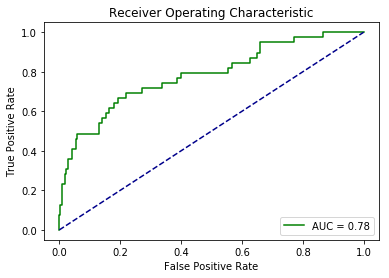

In [114]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gini Impurity

In [73]:
X = data.drop('Attrition',axis = 1)
Y = data['Attrition']

# Spliting the Data into trainning and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
x_train.shape

(1029, 34)

# Build Decision Trees and Predicting the value to x_test

In [74]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0]


# Confussion matrix

In [76]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[315,  56],
       [ 47,  23]], dtype=int64)

* From this confussion matrix, 313 are truely classified as positive, 58 are falsely classified as positive, 45 are falsely classified as negative and 25 are truely classified as negative.
* i.e., out of 441 rows, 338 are correctly classified and 103 are wrongly classified

# Accurary

In [77]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 76.64399092970523


* The model is 76.64% accurate.
* Using this model, we can predict 76.64% of information of target variable ('Attrition') accurately.

# Drawing Decision Tree

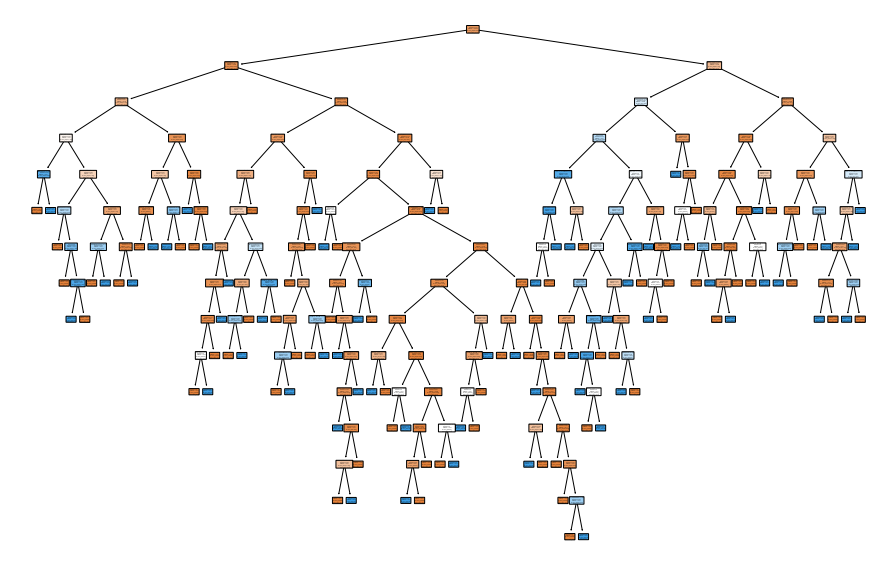

In [78]:
cols = list(X.columns.values)
plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

# Area under the curve

In [79]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5932614555256065


* Area under the curve is 59.1%.
* So, 59% of the data is predicted correctly.

# ROC curve

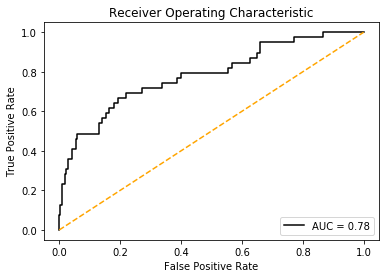

In [115]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# With Pruning

# Build Decision Trees and Predicting the value to x_test

In [81]:
clf = DecisionTreeClassifier(splitter='random', max_leaf_nodes=10, min_samples_leaf=5,max_depth=5)
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [82]:
y_pred = clf.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Confussion matrix

In [83]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[364,   7],
       [ 56,  14]], dtype=int64)

* From this confussion matrix, 353 are truely classified as positive, 18 are falsely classified as positive, 44 are falsely classified negative and 26 are truely classified as negative.
* i.e., out of 441 rows, 379 are correctly classified and 62 are wrongly classified.

# Accurary

In [84]:
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

accuracy (in %) 85.71428571428571


* The model is 85.94% accurate.
* Using this model, we can predict 85.94% of information of target variable ('Attrition') accurately.

# Drawing Decision Tree

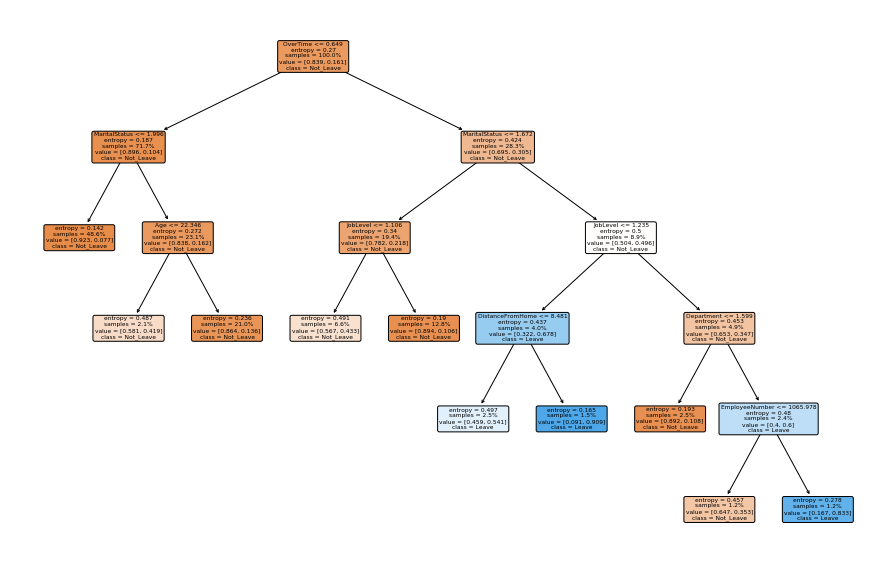

In [85]:
cols = list(X.columns.values)

plt.figure(figsize=(15,10))

tree.plot_tree(clf.fit(X,Y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,
               class_names=['Not_Leave','Leave'])
plt.show()

# Area under the curve

In [86]:
probs = clf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7523103581055063


* Area under the curve is 73.23%.
* So, 73% of the data is predicted correctly.

# ROC curve

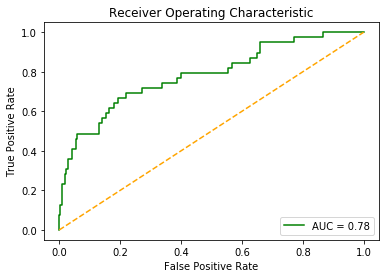

In [116]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [89]:
X = data.drop('Attrition',axis = 1)
Y = data['Attrition']

# Step 2: Split the training test set

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Step 3: Fit a Decision Tree model as comparison

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.7755102040816326

* The model is 79.25% accurate.
* Using this model, we can predict 79.25% of information of target variable ('Attrition') accurately.

In [90]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[220,  35],
       [ 31,   8]], dtype=int64)

* From this confussion matrix, 223 are truely classified as positive, 32 are falsely classified as positive, 29 are falsely classified negative and 10 are truely classified as negative.
* i.e., out of 294 rows, 233 are correctly classified and 61 are wrongly classified.

In [91]:
probs = dt.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.5339366515837104


* Area under the curve is 56.54%.
* So, 56% of the data is predicted correctly.

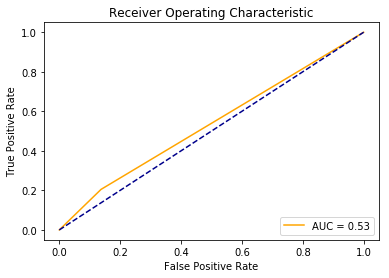

In [92]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# Step 4: Fit a Random Forest model,
# compared to 'Decision Tree model, accuracy go up by 5%'

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# n_estimators indicates the number of trees in the forest

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8775510204081632

* The model is 87.75% accurate.
* Using this model, we can predict 87.75% of information of target variable ('Attrition') accurately.

In [94]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[254,   1],
       [ 35,   4]], dtype=int64)

* From this confussion matrix, 254 are truely classified as positive, 1 are falsely classified as positive, 35 are falsely classified negative and 4 are truely classified as negative.
* i.e., out of 294 rows, 258 are correctly classified and 36 are wrongly classified.

In [95]:
probs = rf.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.721417797888386


* Area under the curve is 72.25%.
* So, 72% of the data is predicted correctly.

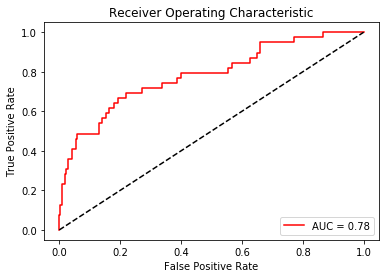

In [117]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
# Step 5: Fit a AdaBoost model,
# compared to 'Decision Tree model, accuracy goes up'

ab = AdaBoostClassifier(n_estimators=100)
ab.fit(x_train, y_train)
y_pred = ab.predict(x_test)
accuracy_score(y_test, y_pred)

0.8673469387755102

* The model is 86.73% accurate.
* Using this model, we can predict 86.73% of information of target variable ('Attrition') accurately.

In [98]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[241,  14],
       [ 25,  14]], dtype=int64)

* From this confussion matrix, 241 are truely classified as positive, 14 are falsely classified as positive, 25 are falsely classified negative and 14 are truely classified as negative.
* i.e., out of 294 rows, 255 are correctly classified and 39 are wrongly classified.

In [99]:
probs = ab.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7762694821518351


* Area under the curve is 77.62%.
* So, 77% of the data is predicted correctly.

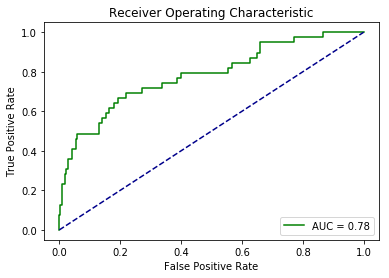

In [118]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
# Step 6: Fit a Gradient Boosting model,
# compared to 'Decision Tree model, accuracy goes up'

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
accuracy_score(y_test, y_pred)

0.8877551020408163

* The model is 88.77% accurate.
* Using this model, we can predict 88.77% of information of target variable ('Attrition') accurately.

In [102]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[248,   7],
       [ 26,  13]], dtype=int64)

* From this confussion matrix, 248 are truely classified as positive, 7 are falsely classified as positive, 26 are falsely classified negative and 13 are truely classified as negative.
* i.e., out of 294 rows, 261 are correctly classified and 33 are wrongly classified.

In [103]:
probs = gb.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7831070889894419


* Area under the curve is 78.39%.
* So, 78% of the data is predicted correctly.

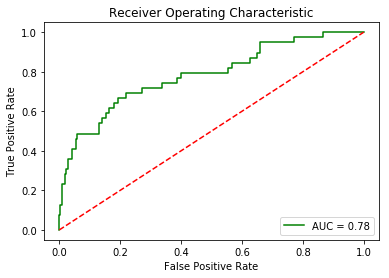

In [119]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.8877551020408163

* The model is 88.77% accurate.
* Using this model, we can predict 88.77% of information of target variable ('Attrition') accurately.

In [106]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[250,   5],
       [ 28,  11]], dtype=int64)

* From this confussion matrix, 250 are truely classified as positive, 5 are falsely classified as positive, 28 are falsely classified negative and 11 are truely classified as negative.
* i.e., out of 294 rows, 261 are correctly classified and 33 are wrongly classified.

In [107]:
probs = xgb.predict_proba(x_test)

prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)

print('Area under the curve:',roc_auc)

Area under the curve: 0.7827048768225239


* Area under the curve is 78.27%.
* So, 78% of the data is predicted correctly.

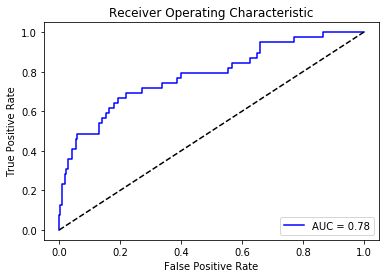

In [120]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ----------------------------------------------- END --------------------------------------------------------